In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# 5-color palette
color_palette = ['orchid', 'cornflowerblue', 'mediumaquamarine', 'mediumpurple', 'darksalmon']

def five_color_planar_coloring(graph):

    # Step 1: Check if the graph is planar
    is_planar, _ = nx.check_planarity(graph)
    if not is_planar:
        raise ValueError("The input graph is not planar and cannot be 5-colored.")

    # Step 2: Vertex reduction
    stack = []
    mutable_graph = graph.copy()

    """
    Stack is used to store removed vertices along with their neighbors. 
    This allows the algorithm to "rebuild" the graph later in reverse order.
    Then a mutable copy of the graph is created for modification during reduction
    """

    while mutable_graph.nodes:
        # Find a vertex with degree <= 5
        for node in list(mutable_graph.nodes):
            if mutable_graph.degree[node] <= 5:
                stack.append((node, list(mutable_graph.neighbors(node))))  # Save node and its neighbors
                mutable_graph.remove_node(node)
                break
        else:
            # If no node with degree <= 5 is found, the graph is not planar (should not happen)
            raise ValueError("Graph reduction failed. This should not occur for a planar graph.")

    # Step 3: Reinstatement and coloring
    node_colors = {}

    """
    A dictionary is used to store the color assigned to each node.
    """

    # Process nodes in reverse order of their removal   
    while stack:
        node, neighbors = stack.pop()

        # Find the colors of the neighbors
        neighbor_colors = {node_colors[neighbor] for neighbor in neighbors if neighbor in node_colors}
       
        """
        This ensures that the reinstated node will not share a color with its adjacent nodes.
        """
       
        # Assign the first available color that is not used by neighbors
        for color in color_palette:
            if color not in neighbor_colors:
                node_colors[node] = color
                break

    return node_colors

# Visualization function
def visualize_colored_graph(graph, node_colors):
    pos = nx.spring_layout(graph)
    # Map nodes to their assigned colors
    colors = [node_colors[node] for node in graph.nodes]
    nx.draw(graph, pos, with_labels=True, node_color=colors, node_size=500, font_color='white')
    plt.show()


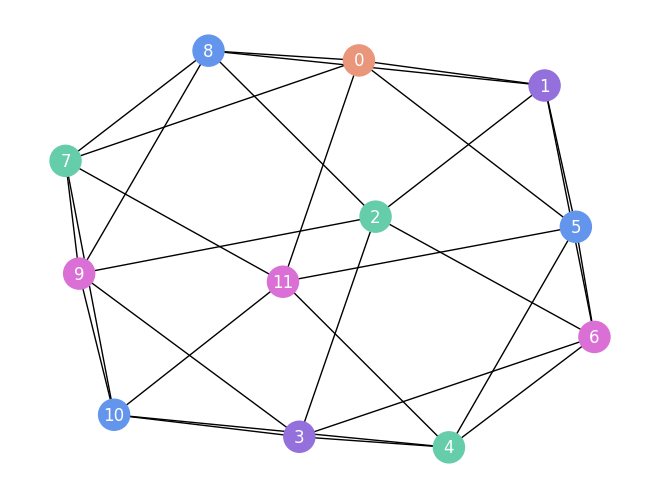

In [18]:
# Example usage
if __name__ == "__main__":
    # Create a planar graph (e.g., a icosahedron graph)
    G = nx.icosahedral_graph()

    # Get the 5-coloring
    coloring = five_color_planar_coloring(G)

    # Visualize the graph
    visualize_colored_graph(G, coloring)

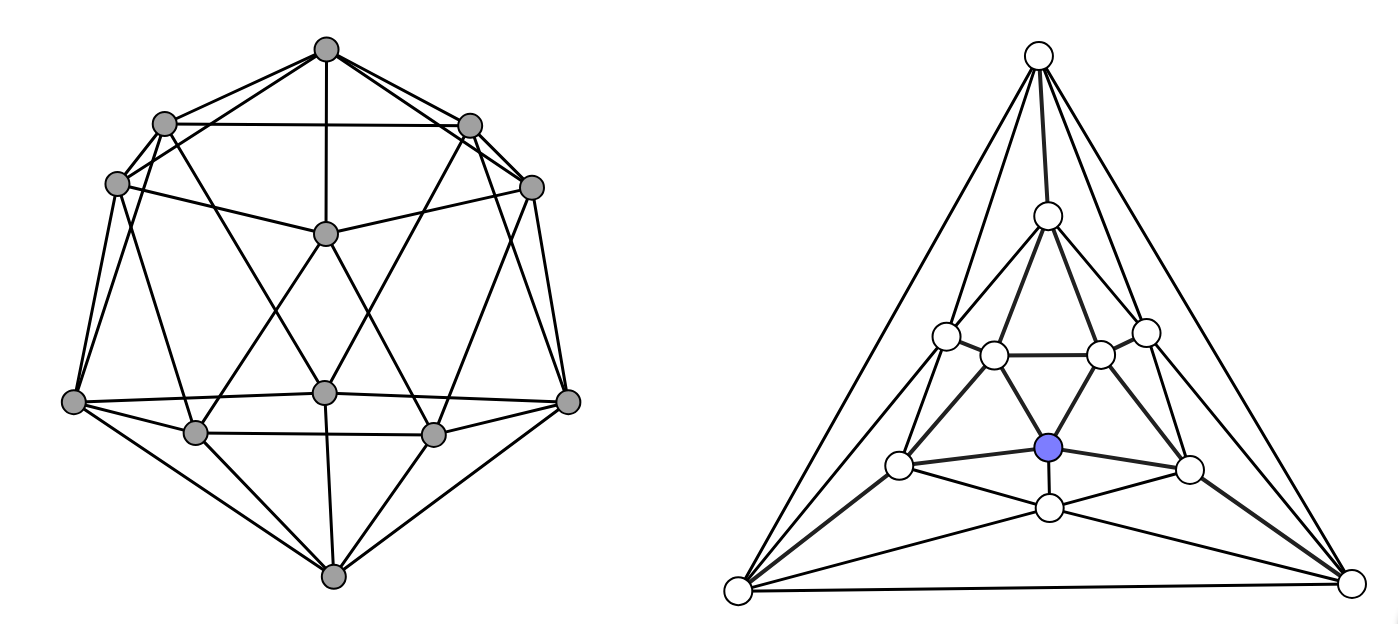

Icosahedron is a solid with 20 equilateral triangles as faces